# Probabilistic Graphical Models — Exploratory Project

This notebook presents a series of experiments and analyses related to probabilistic graphical models, including inference, structure learning, and applications. The content is organized as a self-contained project, with explanations, code, and visualizations to illustrate key concepts.

---

*Note: This notebook is intended as a research-style or exploratory project document, not as a course assignment. All instructions, submission details, and point values have been removed for clarity and neutrality.*

### Import Necessary Libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse
import matplotlib.gridspec as gridspec

### Exercise 1. Multivariate Gaussians (10 points)

1.1 Consider the 2D normal distribution

$$ p(x,y) \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma}) $$

Define three separate 2D covariance matrices $\mathbf{\Sigma}$ for each of the following cases: $x$ and $y$ are uncorrelated; $x$ and $y$ are correlated; and $x$ and $y$ are anti-correlated.  Plot samples from these distributions to show these properties.  Use a different mean for each.  Make sure your plots show the density. 

#### Case 1: $x$ and $y$ are uncorrelated

$x$ and $y$ are uncorrelated if and only if their cross-covarince values are 0 if we assume that they belong to multivariate gaussian distribution. Therefore, the covariance matrix of two uncorrelated random variables will be:

$$
\mathbf{\Sigma_{uncorrelated}}= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
$$

I will choose the mean as the following for this case for the simplicity:

$$
\mathbf{\mu_{uncorrelated}} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$


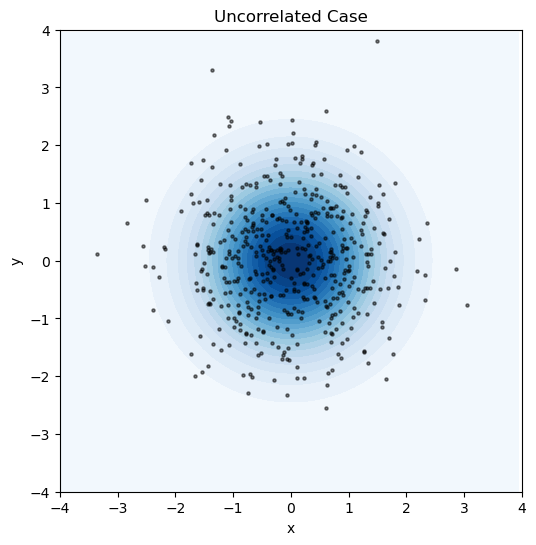

In [5]:
uncorr_cov = np.array([[1, 0], [0, 1]])
uncorr_mean = np.array([0,0])
# Generate samples
uncorr_samples = np.random.multivariate_normal(uncorr_mean, uncorr_cov, 500)

# Create density grid
x, y = np.mgrid[-4:4:.05, -4:4:.05]
pos = np.dstack((x, y))
rv = multivariate_normal(uncorr_mean, uncorr_cov)
density = rv.pdf(pos)

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(x, y, density, cmap="Blues", levels=20)
plt.scatter(uncorr_samples[:, 0], uncorr_samples[:, 1], s=5, color="black", alpha=0.5)
plt.title("Uncorrelated Case")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal')
plt.show()

#### Case 2: $x$ and $y$ are correlated


In order to see that $x$ and $y$ are correlated, I choose the following covariance matrix:

$$
\mathbf{\Sigma_{uncorrelated}}= \begin{bmatrix} 1 & 0.97 \\ 0.97 & 1 \end{bmatrix}
$$

I will choose the mean as the following for this case for the simplicity again, different from the first case:

$$
\mathbf{\mu_{uncorrelated}} = \begin{bmatrix} 2\\ 2 \end{bmatrix}
$$
As seen, the large off-diagonal entries (0.97) create a strong positive correlation, resulting in an elliptical density contour tilted at 45°.

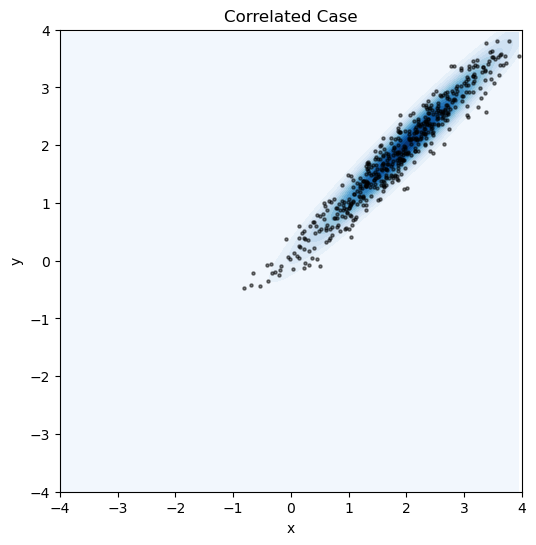

In [6]:
corr_cov = np.array([[1, 0.97], [0.97, 1]])
corr_mean = np.array([2,2])
# Generate samples
corr_samples = np.random.multivariate_normal(corr_mean, corr_cov, 500)

# Create density grid
x, y = np.mgrid[-4:4:.05, -4:4:.05]
pos = np.dstack((x, y))
rv = multivariate_normal(corr_mean, corr_cov)
density = rv.pdf(pos)

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(x, y, density, cmap="Blues", levels=20)
plt.scatter(corr_samples[:, 0], corr_samples[:, 1], s=5, color="black", alpha=0.5)
plt.title("Correlated Case")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal')
plt.show()

#### Case 3: $x$ and $y$ are anti-correlated


In order to see that $x$ and $y$ are anti-correlated, I choose the following covariance matrix:

$$
\mathbf{\Sigma_{uncorrelated}}= \begin{bmatrix} 1 & -0.8 \\ -0.8 & 1 \end{bmatrix}
$$

I will choose the mean as the following for this case for the simplicity again, different from the first and the second case:

$$
\mathbf{\mu_{uncorrelated}} = \begin{bmatrix} -1\\ -1 \end{bmatrix}
$$
As seen, the large negative off-diagonal entries (-0.8) create a strong negative correlation, resulting in an elliptical density contour tilted at -45°.

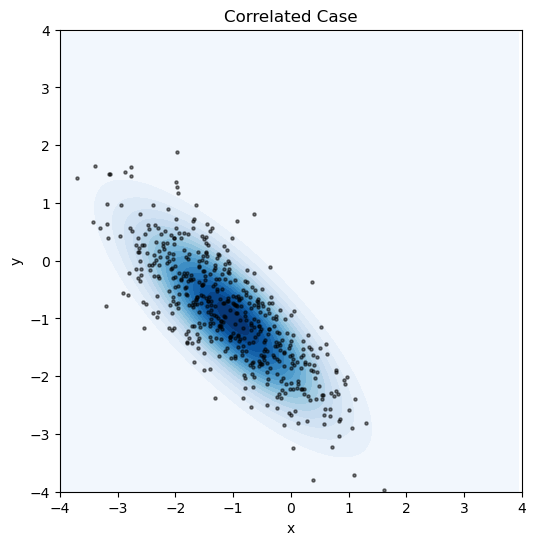

In [7]:
anticorr_cov = np.array([[1, -0.8], [-0.8, 1]])
anticorr_mean = np.array([-1,-1])
# Generate samples
anticorr_samples = np.random.multivariate_normal(anticorr_mean, anticorr_cov, 500)

# Create density grid
x, y = np.mgrid[-4:4:.05, -4:4:.05]
pos = np.dstack((x, y))
rv = multivariate_normal(anticorr_mean, anticorr_cov)
density = rv.pdf(pos)

# Plot
plt.figure(figsize=(6, 6))
plt.contourf(x, y, density, cmap="Blues", levels=20)
plt.scatter(anticorr_samples[:, 0], anticorr_samples[:, 1], s=5, color="black", alpha=0.5)
plt.title("Correlated Case")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect('equal')
plt.show()

1.2 Compute the principal axes for each of these distributions, i.e. the eigenvectors of the covariance matrices.  Use can use a linear algebra package. Plot the samples again, but this time overlay the 1, 2, and 3-sigma contours and with the scaled eigenvectors.

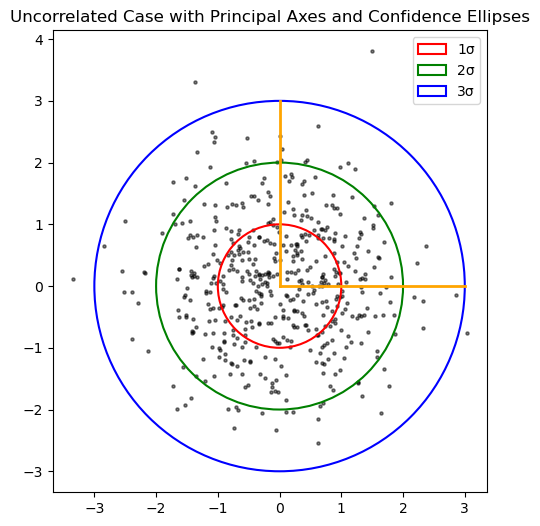

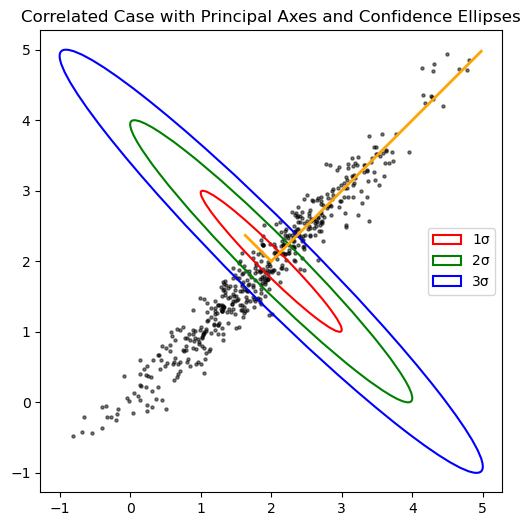

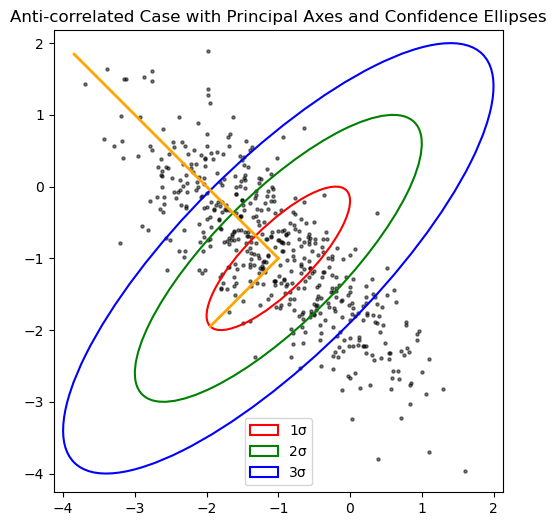

In [8]:
def principal_axes_compute_and_plot(cov,mu,samples,name_plot):
    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Function to plot confidence ellipses
    def plot_ellipse(ax, mean, cov, n_std=1.0, **kwargs):
        eigvals, eigvecs = np.linalg.eigh(cov)
        angle = np.degrees(np.arctan2(*eigvecs[:, 1][::-1]))
        width, height = 2 * n_std * np.sqrt(eigvals)
        ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, **kwargs)
        ax.add_patch(ellipse)

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(samples[:, 0], samples[:, 1], s=5, color="black", alpha=0.5)

    # Plot 1, 2, 3-sigma contours
    colors = ['red', 'green', 'blue']
    for i, n_std in enumerate([1, 2, 3]):
        plot_ellipse(ax, mu, cov, n_std=n_std, edgecolor=colors[i], facecolor='none', linewidth=1.5, label=f'{n_std}σ')

    # Plot scaled eigenvectors
    for i in range(2):
        vec = eigvecs[:, i]
        scale = np.sqrt(eigvals[i]) * 3  # scale for visibility
        ax.plot([mu[0], mu[0] + vec[0]*scale], [mu[1], mu[1] + vec[1]*scale], color='orange', linewidth=2)

    ax.set_title(name_plot +" Case with Principal Axes and Confidence Ellipses")

    ax.set_aspect('equal')
    ax.legend()
    plt.show()

principal_axes_compute_and_plot(uncorr_cov,uncorr_mean,uncorr_samples,"Uncorrelated")
principal_axes_compute_and_plot(corr_cov,corr_mean,corr_samples,"Correlated")
principal_axes_compute_and_plot(anticorr_cov,anticorr_mean,anticorr_samples,"Anti-correlated")

#### Explanation:

The principal axes are computed by finding the  eigenvectors of the covariance matrix for each distribution samples.  The first graph belongs to the uncorrelted case in ehich the axes align with the x and y axes because there is no correlation between the variables. The circular confidence ellipses shown by red, green and blue has circular shapes since the spread of the data is the same in both directions. For the correlated case, it is easy to see that datapoints have a clear positive correlation. In this case, the principal axes are rotated along the direction of the maximum variance. Finally, in the anti-corralted case, the axes are rotated as in the case of the correlated case. However, this time they are roatated in the opposite direction and this shows a negative correlation. The 1σ, 2σ, and 3σ contours represent the spread of the data based on the eigenvalues, showing how variance is distributed along the principal directions.

### Exercise 2. Linear Gaussian Models 

Consider two independent multi-dimensional Gaussian random vector variables
$
\gdef\bx{\mathbf{x}}
\gdef\bz{\mathbf{z}}
\gdef\by{\mathbf{y}}
\gdef\bm{\mathbf{m}}
\gdef\mbmu{\mathbf{\mu}} % don't collide with \bm
\gdef\bS{\mathbf{\Sigma}}
\gdef\bA{\mathbf{A}}
\gdef\bB{\mathbf{B}}
\gdef\bc{\mathbf{c}}
\gdef\N{\mathcal{N}}
$

$$
\begin{aligned}
p(\bx) &=& \mathcal{N}(\bx | \mbmu_x, \bS_x) \\
p(\bz) &=& \mathcal{N}(\bz | \mbmu_z, \bS_z)
\end{aligned}
$$

Now consider a third variable that is the sum of the first two:

$$
\by = \bx + \bz
$$


2.1  What is the expression for the distribution $p(\by)$?

**Soution:** Normally, if we put together normal random variables together in a random vector, their joint distrbitution or the summation are not necessarily mulltivariate normal unless we can assume independence. However, in this question since we assume that they are independent, their summation is also multivariate normal. Therefore, we can express the distribution as in the following:

$$
p(\mathbf{y}) = \mathcal{N}(\mathbf{y} \,|\, \mathbf{\mu}_x + \mathbf{\mu}_z, \, \mathbf{\Sigma}_x + \mathbf{\Sigma}_z)
$$


2.2  What is the expression for the condidtional distribution $p(\by|\bx)$?

**Solution:** Since $\by = \bx + \bz$ in this question, conditioning y on x actually removes the randomnees of x. Therefore,

$$
p(\mathbf{y | x}) = \mathcal{N}( x + \mathbf{\mu}_z, \,  \mathbf{\Sigma}_z)
$$

2.3  Write code to illustrate the result in Q2.1. Show both the components of $\by = \bx + \bz$ and that the sampling from the analytic result is the same as adding two samples.

<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_2658493/2937744000.py:35: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Samples from $\mathbf{y} = \mathbf{x} + \mathbf{z}$")
/tmp/ipykernel_2658493/2937744000.py:41: SyntaxWarning: invalid escape sequence '\m'
  plt.scatter(y_samples_direct[:, 0], y_samples_direct[:, 1], alpha=0.3, color='orange', label="Direct samples from $p(\mathbf{y})$")
/tmp/ipykernel_2658493/2937744000.py:42: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Direct samples from $p(\mathbf{y})$")
/tmp/ipykernel_2658493/2937744000.py:47: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/ilkekas/anaconda3/lib/python3.12/s

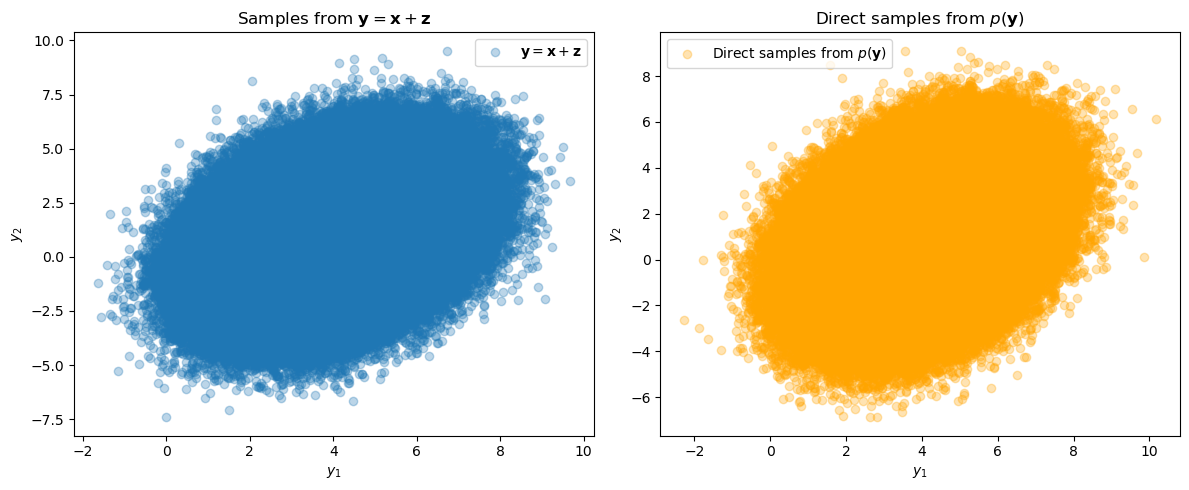

Empirical mean of (x + z): [3.99934525 0.99810801]
Empirical mean of direct samples: [3.99953505 0.99758799]
Empirical covariance of (x + z):
 [[1.49925891 0.69679479]
 [0.69679479 2.99971688]]
Empirical covariance of direct samples:
 [[1.50178298 0.70299672]
 [0.70299672 3.0020546 ]]
Wasserstein distance between y1: 0.0015676987057213745
Wasserstein distance between y2: 0.0014241661381570007


In [9]:



# Set random seed for reproducibility
np.random.seed(42)

mu_x = np.array([1.0, 2.0])
Sigma_x = np.array([[1.0, 0.5],
                    [0.5, 2.0]])

mu_z = np.array([3.0, -1.0])
Sigma_z = np.array([[0.5, 0.2],
                    [0.2, 1.0]])


N = 1000000


x_samples = np.random.multivariate_normal(mu_x, Sigma_x, N)
z_samples = np.random.multivariate_normal(mu_z, Sigma_z, N)

# Compute y = x + z
y_samples_sum = x_samples + z_samples

# Analytic mean and covariance of y
mu_y = mu_x + mu_z
Sigma_y = Sigma_x + Sigma_z

# Sample directly from analytic p(y)
y_samples_direct = np.random.multivariate_normal(mu_y, Sigma_y, N)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_samples_sum[:, 0], y_samples_sum[:, 1], alpha=0.3, label=r"$\mathbf{y} = \mathbf{x} + \mathbf{z}$")
plt.title("Samples from $\mathbf{y} = \mathbf{x} + \mathbf{z}$")
plt.xlabel("$y_1$")
plt.ylabel("$y_2$")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_samples_direct[:, 0], y_samples_direct[:, 1], alpha=0.3, color='orange', label="Direct samples from $p(\mathbf{y})$")
plt.title("Direct samples from $p(\mathbf{y})$")
plt.xlabel("$y_1$")
plt.ylabel("$y_2$")
plt.legend()

plt.tight_layout()
plt.show()

# Optional: Verify sample means and covariances are close
print("Empirical mean of (x + z):", np.mean(y_samples_sum, axis=0))
print("Empirical mean of direct samples:", np.mean(y_samples_direct, axis=0))
print("Empirical covariance of (x + z):\n", np.cov(y_samples_sum, rowvar=False))
print("Empirical covariance of direct samples:\n", np.cov(y_samples_direct, rowvar=False))

from scipy.stats import wasserstein_distance

# Flatten for comparison
distance_1 = wasserstein_distance(y_samples_sum[:, 0], y_samples_direct[:, 0])
distance_2 = wasserstein_distance(y_samples_sum[:, 1], y_samples_direct[:, 1])

print(f"Wasserstein distance between y1: {distance_1}")
print(f"Wasserstein distance between y2: {distance_2}")



**Explanation:** 
The results show that the empirical mean and covariance of $z = x+ y$ closely match those of the direct samples from the analytic distribution  p(y). It confirms the theoretical result that the sum of two independent Gaussians is also Gaussian. The scatter plots of both methods exhibit an almost identical elliptical shape. Additionally, the very small Wasserstein distances between the two sets of samples also verify that their distributions are nearly the same. This proves that the results of directly sampling y or adding independent samples of x and z are equal.

### Exercise 3. Dimensionality Reduction and PCA 

In this quesiton you will use principal component analysis to reduce the dimensionality of your data and analyze the results.

3.1 ( Find a set of high dimensional data.  It should be continuous and have at least 6 dimensions, e.g. stats for sports teams, small sound segments or images patches also work.  Note that if the dimensionality of the data is too large, you might run into computational efficiency problems using standard methods.  Describe the data and illustrate it, if appropriate.

**Answer:**

In this question, the Glass Identification Database, contains 214 instances of glass samples, each described by 9 chemical properties and 1 physical property (refractive index), along with a class label indicating the type of glass.

The primary motivation behind this dataset was to help forensic investigations — specifically, to identify the type of glass left at a crime scene by analyzing its physical and chemical properties. Here are the fetaures:

Each row in the dataset corresponds to a single glass sample and includes (all of them are continuous, no missing values):

| Attribute | Description                          |
|:--------:|:-------------------------------------:|
| RI      | Refractive Index (physical property)  |
| Na      | Sodium (chemical weight %)            |
| Mg      | Magnesium (chemical weight %)         |
| Al      | Aluminum (chemical weight %)          |
| Si      | Silicon (chemical weight %)           |
| K       | Potassium (chemical weight %)         |
| Ca      | Calcium (chemical weight %)           |
| Ba      | Barium (chemical weight %)            |
| Fe      | Iron (chemical weight %)              |
| Type    | Class label (Type of glass)           |

Majority class:
The dataset is imbalanced — the majority of samples are window glass (class 1, 2, 3) with a total of 163 instances, while non-window glass types (containers, tableware, headlamps) have only 51 instances.






In [10]:
! pip install kagglehub

In [11]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("uciml/glass")

print("Path to dataset files:", path)

# List the files in the dataset folder
files = os.listdir(path)
print("Files downloaded:", files)

# Assuming the file is named 'glass.csv' or similar
csv_file = [f for f in files if f.endswith('.csv')][0]  # Automatically picks the CSV file

# Load into DataFrame
file_path = os.path.join(path, csv_file)
df = pd.read_csv(file_path)

# Show first few rows
print(df.head())

Path to dataset files: /home/ilkekas/.cache/kagglehub/datasets/uciml/glass/versions/1
Files downloaded: ['glass.csv']
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


3.2  Compute the principal components of the data.  Interpret the first two or three eigenvectors in terms of how they are modeling the dimensions in the data space.  Focus on the values of each eigenvector and whether they co-vary or not in the data dimensions.  If it does make sense to plot them, you should, e.g. if you're computing the eigenvectors of sounds or images.

Before applying PCA to the dataset, I wanted to check whether this dataset is suitable for PCA or not since PCA is useful only the data follows an elliptical distribtuion. That is why I plot the pairwise scatter plots and the correlation heatmap as in the followin. As we can see from the results, we can see that many variables seems like linearly related to each other such as RI and CA, FE and nearly all others. Therefore, applying PCA to this dataset is a good idea since PCA assumes a linear relationship betweeen inputs, which is the case in this dataset.

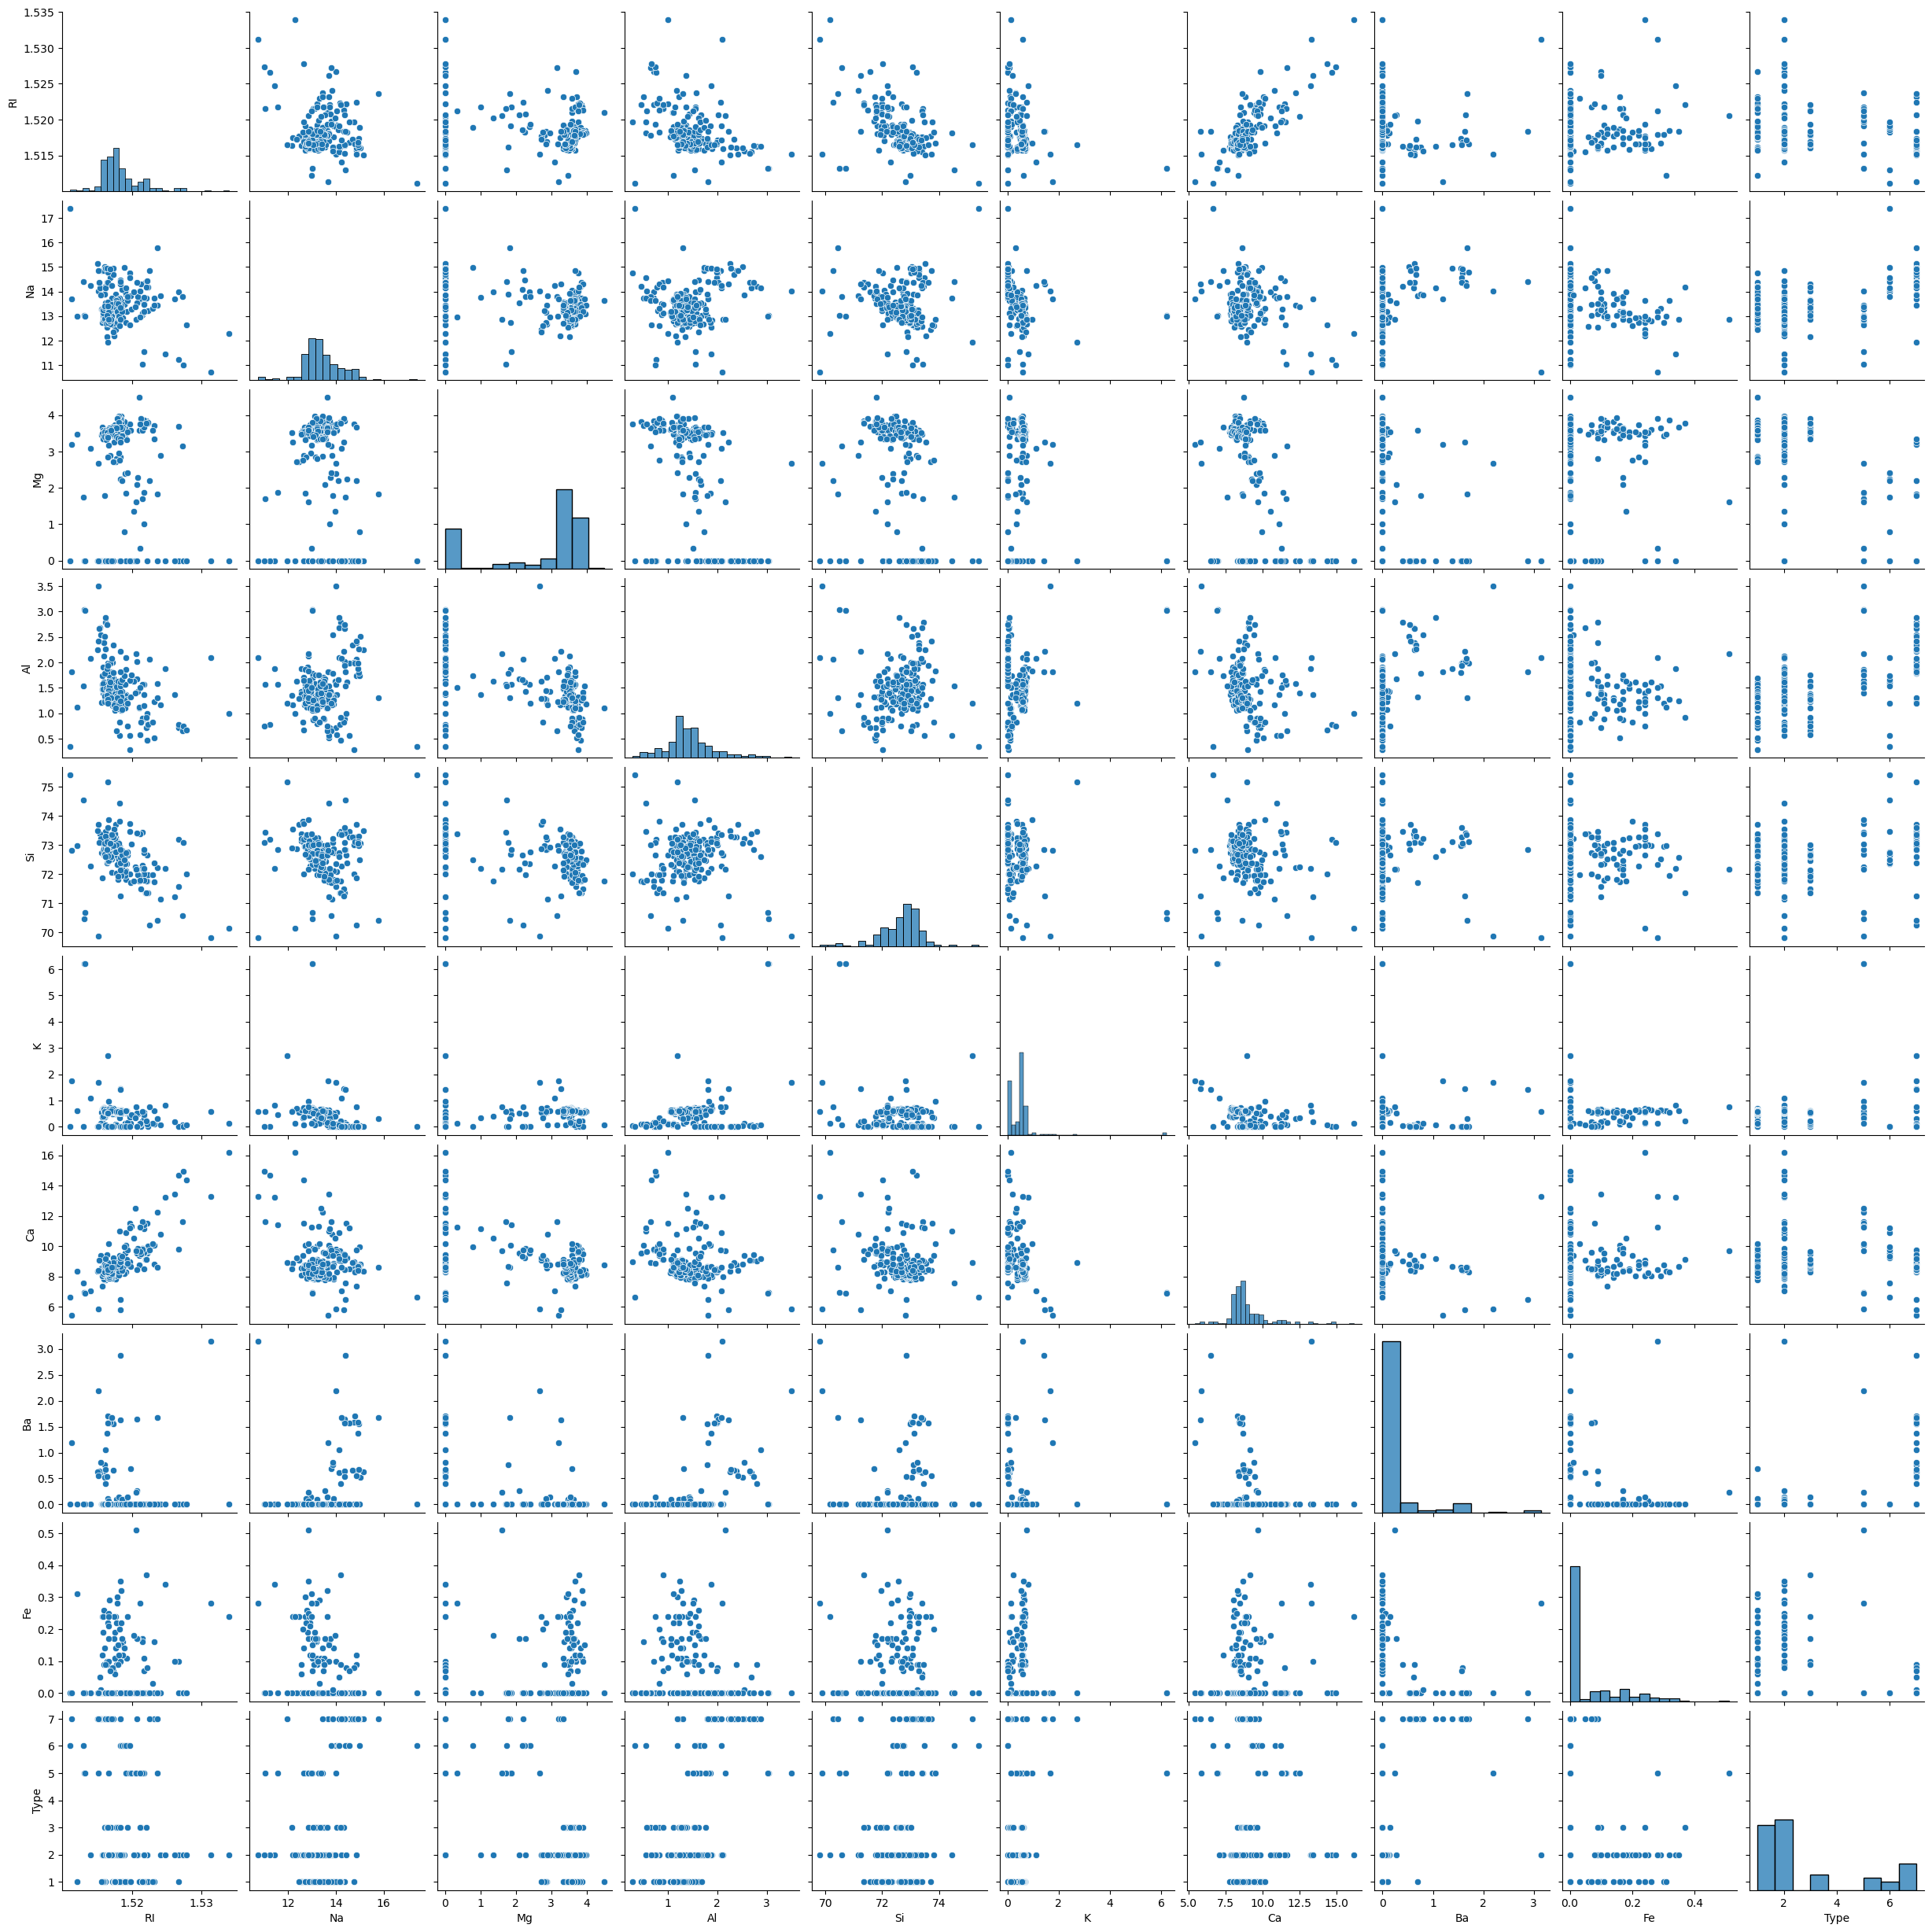

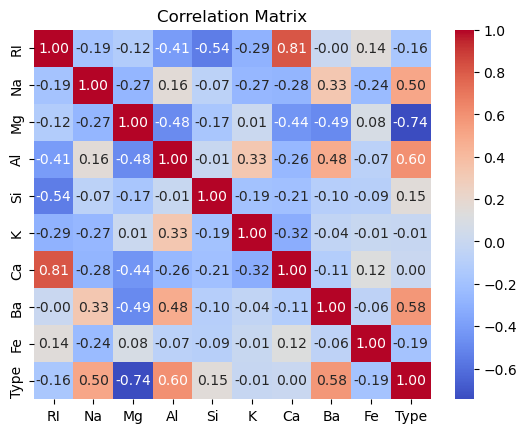

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns


# Check the ellipticity of the data
# Pair plot (R'deki pairs() fonksiyonunun birebir karşılığı)
sns.pairplot(df)
plt.show()

# Korelasyon matrisini inceleme
corr_matrix = df.corr()

# Korelasyon matrisi ısı haritası
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


/tmp/ipykernel_2658493/2324285845.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


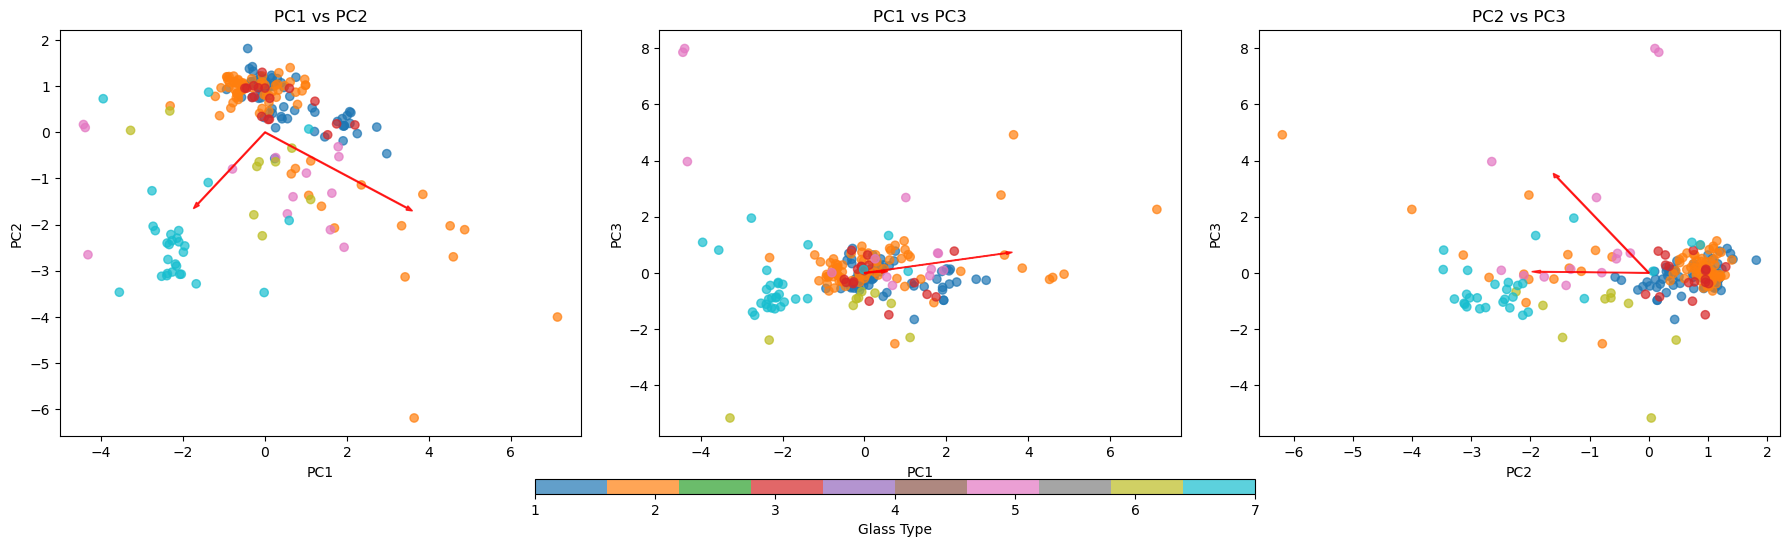

Explained variance ratio: [0.27901819 0.2277858  0.15609378]

First three principal components (eigenvectors):

PC1: [ 0.54517662 -0.2581256   0.11088095 -0.42870863 -0.22883635 -0.21934405
  0.49230609 -0.25037512  0.18584154]
PC2: [-0.28568318 -0.27035007  0.59355826 -0.29521154  0.15509891  0.15397013
 -0.3453798  -0.48470218  0.06203879]
PC3: [ 0.08691083 -0.38491962  0.00841796  0.32923712 -0.45870884  0.66257412
 -0.00098473  0.07405473  0.28445055]


In [13]:
X = df.drop(columns=['Type'])
y = df['Type']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (all components)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot pairwise
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
pairs = [(0, 1), (0, 2), (1, 2)]
titles = ['PC1 vs PC2', 'PC1 vs PC3', 'PC2 vs PC3']

scatters = []

for i, ax in enumerate(axes):
    x_idx, y_idx = pairs[i]
    scatter = ax.scatter(X_pca[:, x_idx], X_pca[:, y_idx], c=y, cmap='tab10', alpha=0.7)
    scatters.append(scatter)
    ax.set_xlabel(f'PC{x_idx + 1}')
    ax.set_ylabel(f'PC{y_idx + 1}')
    ax.set_title(titles[i])

    # Plot only relevant eigenvectors
    origin = np.mean(X_pca[:, [x_idx, y_idx]], axis=0)
    for j in [x_idx, y_idx]:
        length = pca.explained_variance_[j]
        vector = pca.components_[j, [x_idx, y_idx]]
        v = vector * 4 * np.sqrt(length)
        ax.arrow(origin[0], origin[1], v[0], v[1],
                 color='red', width=0.02, head_width=0.1, alpha=0.8)

# Add colorbar in a separate axis below
fig.subplots_adjust(bottom=0.5)  # Add space for colorbar
cbar_ax = fig.add_axes([0.3, 0.002, 0.4, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(scatters[0], cax=cbar_ax, orientation='horizontal')
cbar.set_label('Glass Type')

plt.tight_layout()
plt.show()

# Show explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_[:3])

# Show first three principal components (eigenvectors)
print("\nFirst three principal components (eigenvectors):\n")
for i, component in enumerate(pca.components_[:3]):
    print(f"PC{i+1}: {component}")


**Explanation:**
The first three principal components together explain approximately 66.2% of the total variance in the glass dataset, indicating that most of the data’s variability can be captured in three dimensions. The first component (PC1) heavily weights Refractive Index (RI) and Calcium (Ca) positively, and Aluminum (Al) negatively.It suggests that it captures the trade-off between these chemical properties. The second component (PC2) emphasizes Magnesium (Mg) positively and negatively weights Barium (Ba) and Aluminum (Al), indicating that it reflects variance related to the difference between Mg concentration and other elements. The third component (PC3) captures variance influenced by high positive weight on Potassium (K) and negative weight on Silicon (Si), indicating it may distinguish samples based on finer chemical differences not captured by the first two components.

PC1 vs PC2:
This plot shows that the majority of the glass samples cluster around the origin, but certain glass types (especially types 2, 3, and 7) spread more prominently along the PC1 and PC2 directions. The red arrows indicate that PC1 is strongly influenced by Refractive Index and Calcium, while PC2 is primarily shaped by Magnesium and Barium.

PC1 vs PC3:
In the PC1 vs PC3 plot, the spread of data along PC3 is relatively narrow, meaning PC3 captures less variance compared to PC1. The eigenvector arrow shows that PC3 is influenced by Potassium and Silicon, highlighting subtle chemical variations not clearly visible in PC1.

PC2 vs PC3:
The PC2 vs PC3 plot reveals that while PC2 accounts for significant variance and separates some classes, PC3 mostly captures minor variations and does not significantly separate the classes. The red arrows show that PC2 and PC3 directions are nearly orthogonal in some regions, indicating that they capture distinct and non-overlapping patterns in the chemical composition of the glass samples.

3.3 Plot, in decreasing order, the cumulative percentage of variance each eigenvector accounts for as a function of the eigenvector number.  These values should be in decreasing order of the eigenvalues. Interpret these results. 

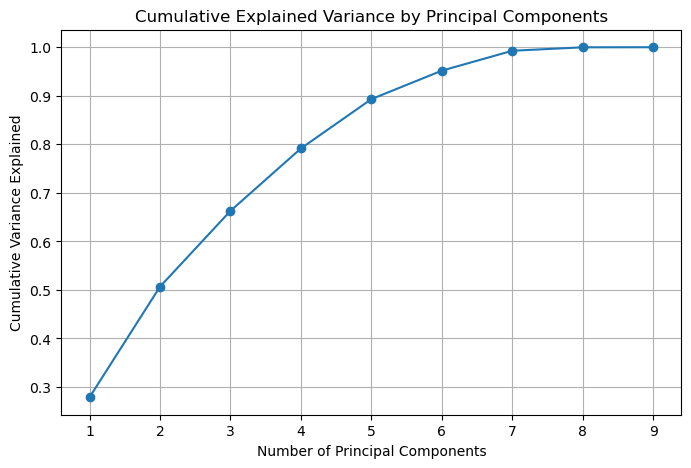

In [14]:
# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.show()

**Answer and Interpretation:**
The `explained_variance_ratio_` attribute in PCA represents the proportion of the dataset's total variance explained by each principal component. It is calculated by dividing each eigenvalue of the covariance matrix by the sum of all eigenvalues, showing how much information each principal component captures. Therfore, I plot them in this question. 


The plot shows that the first three principal components capture nearly 70% of the total variance in the dataset. By the time the fourth component is added, over 80% of the variance is explained. The curve flattens after the fourth component, meaning the remaining components contribute little additional information. Therefore, reducing the data to just 3 or 4 components would preserve most of the structure.


3.4  Plot the original data projected into the space of the two principal eigenvectors (i.e. the eigenvectors with the largest two eigenvalues).  Be sure to either plot relative to the mean, or subtract the mean when you do this.  Interpret your results.  What insights can you draw?  Interpret the dimensions of the two largest principal components.  Which dimensions of the data are correlated?  Or anti-correlated?

Since the data is already scaled by the standard scaler, it is already relative to the mean. Here is the plot of the original data projected into the space of the two principal eigenvectors:

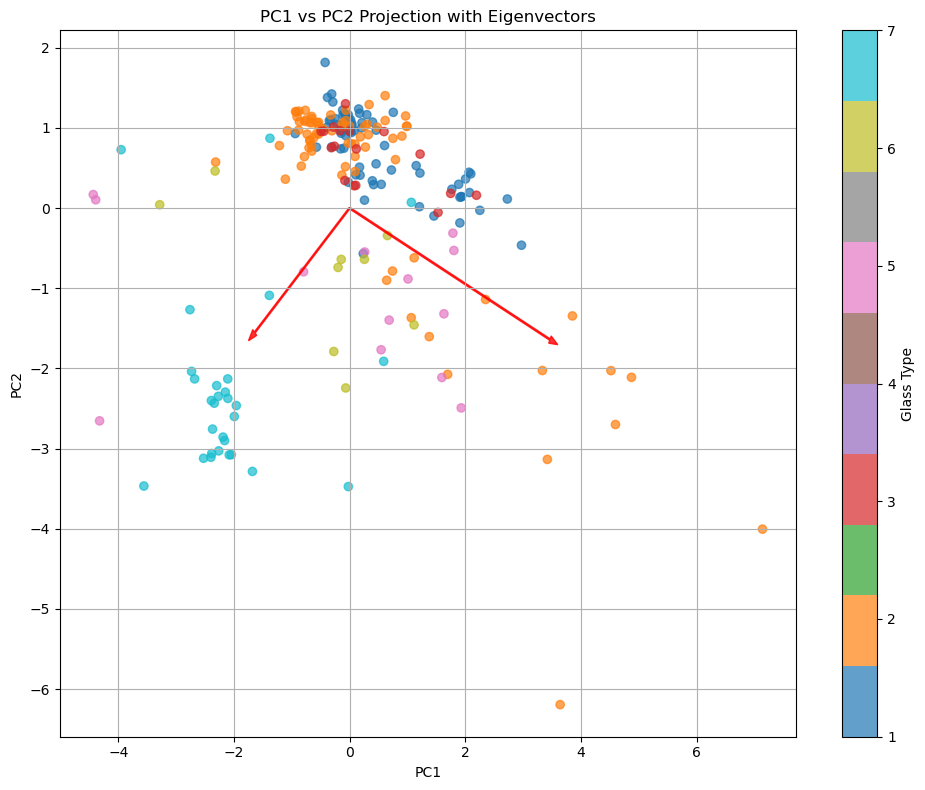

Columns: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
First two principal components (eigenvectors):
 [[ 0.54517662 -0.2581256   0.11088095 -0.42870863 -0.22883635 -0.21934405
   0.49230609 -0.25037512  0.18584154]
 [-0.28568318 -0.27035007  0.59355826 -0.29521154  0.15509891  0.15397013
  -0.3453798  -0.48470218  0.06203879]]
Explained variance ratio: [2.79018192e-01 2.27785798e-01 1.56093777e-01 1.28651383e-01
 1.01555805e-01 5.86261325e-02 4.09953826e-02 7.09477197e-03
 1.78757536e-04]


In [15]:
# Plot PC1 vs PC2
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 Projection with Eigenvectors')

# Plot only PC1 & PC2 eigenvectors
origin = np.mean(X_pca[:, :2], axis=0)
for i in range(2):  # PC1 & PC2
    length = pca.explained_variance_[i]
    vector = pca.components_[i, :2]
    v = vector * 4 * np.sqrt(length)  # Scale for visibility
    plt.arrow(origin[0], origin[1], v[0], v[1],
              color='red', width=0.02, head_width=0.1, alpha=0.8)

plt.colorbar(scatter, label='Glass Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print eigenvectors
print("Columns:", df.columns)
print("First two principal components (eigenvectors):\n", pca.components_[:2])
print("Explained variance ratio:", pca.explained_variance_ratio_)

The plot shows the original glass data projected onto the two largest principal components, after centering the data by subtracting the mean. These two components capture approximately 50% of the total variance, summarizing the main structure in the dataset.
The first principal component primarily reflects a combination of Refractive Index (RI) and Calcium (Ca) positively and Aluminum (Al) negatively, indicating that RI and Ca are positively correlated while Al is anti-correlated.
The second component emphasizes Magnesium (Mg) positively and Barium (Ba) negatively, revealing an anti-correlation between these two chemical elements, which further separates different types of glass.

### Exercise 4. Gaussian Mixture Models 

4.1  Use the EM equations for multivariate Gaussian mixture model to write a program that implements the Gaussian Mixture Model to estimates from an ensemble of data the means, covariance matrices, and class probabilities.  Choose reasonable values for your initial values and a reasonable stopping criterion.  Explain your code and the steps of the algorithm.  Do not assume a diagonal or isotropic covariance matrices.

#### 1- Firstly, we do not have any insights about clusters nor their mean and cov matrices. . After, we decide the number of clusters, we need to initialize the mean, covariance and weights for each cluster.

In [16]:

def initialize_clusters(X, num_clusters, print_initial=False):
    n_samples, n_features = X.shape

    # In here , I initialized the weights equally for each cluster. Somene can do it other way
    pi = np.ones(num_clusters) / num_clusters

    # From the data points, I selected the centers randomly
    indices = np.random.choice(n_samples, num_clusters, replace=False)
    means = X[indices]

    # I initialized the covariances as identity matrices - not sure though since in the question do not assume a diagonal cov matrices but since this is initial value i think that is okay
    covariances = np.array([np.eye(n_features) for _ in range(num_clusters)])

    if print_initial: # check for printing initial values
        print("Initial means:", means)
        print("Initial covariances:", covariances)

    return means, covariances, pi


#### 2- Now, I can implement the E-M algorithm.

##### 2.1-Expectation Step: In this step, I calculated the probability of each data point whether they belong to the each cluster. Then, I evaluated the likelihood function using the current estimate of the parameters.

In [17]:
def calculate_expectation(num_clusters, data, means, covariances, pi):
    # in order to store the values of the weights, first I take the shape of the data and created a empty matrix for the weights
    n_samples, n_features = data.shape
    weights = np.zeros((n_samples, num_clusters))

    # then for each cluster, I created a MVN distr with the corresponding means and covariances
    for j in range(num_clusters):
        mvn = multivariate_normal(mean=means[j], cov=covariances[j])
        # this line calculates the likelihood of each data point under the Gaussian by multiplying it with the current pi. In this way, we have unnormalized responsibility
        weights[:, j] = pi[j] * mvn.pdf(data)

    # Now, I need to normalize across clusters to get responsibilities. So, find the sum and divide to it.
    weights_sum = np.sum(weights, axis=1).reshape(-1, 1)
    responsibilities = weights / weights_sum

    return responsibilities


##### Let me try the functions till this point- I created 3 Gaussian distribution as follows

In [18]:
n_samples = 500
mu1 = [0, 0]
cov1 = [[1, 0.3],
        [0.3, 1]]

mu2 = [5, 5]
cov2 = [[0.8, 0.2],
        [0.2, 0.8]]

mu3 = [10, 0]
cov3 = [[1.2, -0.4],
        [-0.4, 1.2]]

x1 = np.random.multivariate_normal(mu1, cov1, n_samples)
x2 = np.random.multivariate_normal(mu2, cov2, n_samples)
x3 = np.random.multivariate_normal(mu3, cov3, n_samples)

data = np.concatenate((x1, x2, x3))

In [19]:
means, covariances, pi = initialize_clusters(data, num_clusters=3)
responsibilities = calculate_expectation(num_clusters=3, data=data, means=means, covariances=covariances, pi=pi)
print(responsibilities.shape) 
print(responsibilities)


(1500, 3)
[[2.62008985e-08 9.99999974e-01 1.20632121e-11]
 [3.03171388e-13 1.00000000e+00 1.14020914e-14]
 [8.18930307e-06 9.99990019e-01 1.79155476e-06]
 ...
 [9.99999959e-01 1.32133940e-12 4.06736297e-08]
 [9.99967081e-01 5.32611151e-15 3.29192287e-05]
 [9.99992275e-01 2.65343446e-11 7.72460771e-06]]


##### 2.2 - Maximization Step: In this step, I will update the previous mean, cov and weight parameters to maximize the expected likelihood found in the previous expectation calculation step

In [20]:
def calculate_maximization(data, responsibilities):
    # by using the responsibilities and data get the spahes so find how many clusters and features w ehave
    n_samples, n_features = data.shape
    num_clusters = responsibilities.shape[1]

    # create empty arrays to store the means, covariances and pi
    means = np.zeros((num_clusters, n_features))
    covariances = np.zeros((num_clusters, n_features, n_features))
    pi = np.zeros(num_clusters)

    # for each cluster j, get the corresponding responsibility vector (How much each point belongs to that cluster)
    for j in range(num_clusters):
        r = responsibilities[:, j]  
        # In here, I am calculating the total responsibility for the cluster ->  N_j = sum_i r_ij
        total_responsibilty = np.sum(r)

        # In here, I am updating the mean of cluster j by using the weighted average of the datapoints -> μ_j = (1 / N_j) * sum_{i=1}^{n_samples} (r_{i,j} * x_i)
        means[j] = np.sum(r[:, np.newaxis] * data, axis=0) / total_responsibilty

        # need to update the vovariances too. But I first computed tge difference from mean, then find the outer product and take the weighted sum of them
        diff = data - means[j]
        covariance_temp = np.dot((r[:, np.newaxis] * diff).T, diff)
        # normalizing by total responsibility
        covariances[j] =  covariance_temp / total_responsibilty

        # update the mixture weight by dividing the total responsibility to the number of samples
        pi[j] = total_responsibilty / n_samples

    return means, covariances, pi


#### Try whether it is working till this point or not

In [21]:

responsibilities = calculate_expectation(num_clusters=3, data=data, means=means, covariances=covariances, pi=pi)
calculate_maximization(data, responsibilities)


(array([[ 8.66283249e+00,  1.20600960e+00],
        [-3.74406398e-02, -2.96333094e-03],
        [ 4.78310543e+00,  5.26194921e+00]]),
 array([[[ 5.70383974, -4.5794841 ],
         [-4.5794841 ,  5.0376196 ]],
 
        [[ 0.96289099,  0.25289677],
         [ 0.25289677,  0.99884504]],
 
        [[ 0.81091963,  0.26028774],
         [ 0.26028774,  0.58009387]]]),
 array([0.46212243, 0.33391273, 0.20396484]))

4.2  Write code to plot the 3-sigma contours of each Gaussian overlayed on the data (try to find a library function to plot ellipses).  Illustrate with an example.

In [22]:

def plot_3sigma_all_clusters(data, means, covariances):
    # create the plot and initialize the colors for the sigma ellipses
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(data[:, 0], data[:, 1], s=10, alpha=0.3, label='Data')
    sigma_colors = ['blue', 'orange', 'red']
    # itrate over ach cluster (the num clusters can be find as the length of the mean vector in my implementation)
    for j in range(len(means)):
        # Do the eigenvalue decomposition to find the eigenvalues. Eigenvalues corresponds to the length of ellipse axes while the eigenvectors shows the orientation of the ellipses
        eigvals, eigvecs = np.linalg.eigh(covariances[j])
        # sort them in descending order so that the first axis is the major axis of the ellipse
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]


        # this part, I got helped by AI. SInce I needed to compute the rotation angle of the ellipse based on the first eigen vector so I can drow them. 
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

        # It is time to plot 
        for nsig, color in zip(range(1, 4), sigma_colors):
            width, height = 2 * nsig * np.sqrt(eigvals)
            ellipse = Ellipse(xy=means[j], width=width, height=height, angle=angle,
                              edgecolor=color, fc='None', lw=2, 
                              label=f'{nsig}-Sigma' if j == 0 else None)
            ax.add_patch(ellipse)

        # show the means in the plot
        ax.scatter(means[j][0], means[j][1], marker='x', s=100, label=f'Cluster {j+1} Mean')

    ax.set_title('GMM Estimated 1-2-3 Sigma Contours')
    ax.legend()
    plt.grid()
    plt.show()


In [23]:
## This fucntion train the gaussian mixture model by using the functions I defined above
def train_gmm(data, n_components=3, n_steps=1000, plot_intermediate_steps_flag=True, tol=1e-3, seed=42):
    np.random.seed(seed)  
    ## Initialize the clusters
    means, covariances, pi = initialize_clusters(data, n_components)
    # Initial Plot
    # Show the final plot
    plot_3sigma_all_clusters(data, means, covariances)
    
    # for each step
    for step in range(n_steps):
        prev_means = means.copy()
        prev_covariances = covariances.copy()

        # Expectation Step 
        responsibilities = calculate_expectation(n_components, data, means, covariances, pi)

        # Maximization Step
        means, covariances, pi = calculate_maximization(data, responsibilities)

        # Plot intermediate steps every 10 step
        if plot_intermediate_steps_flag and step % 10 == 0:
            plot_3sigma_all_clusters(data, means, covariances)

        # Tolerance check - it is especially important if the step is too high
        mean_change = np.linalg.norm(means - prev_means)
        cov_change = np.linalg.norm(covariances - prev_covariances)
        if mean_change < tol and cov_change < tol:
            print(f"Converged at step {step}")
            break

    # Show the final plot
    plot_3sigma_all_clusters(data, means, covariances)

    return means, covariances, pi


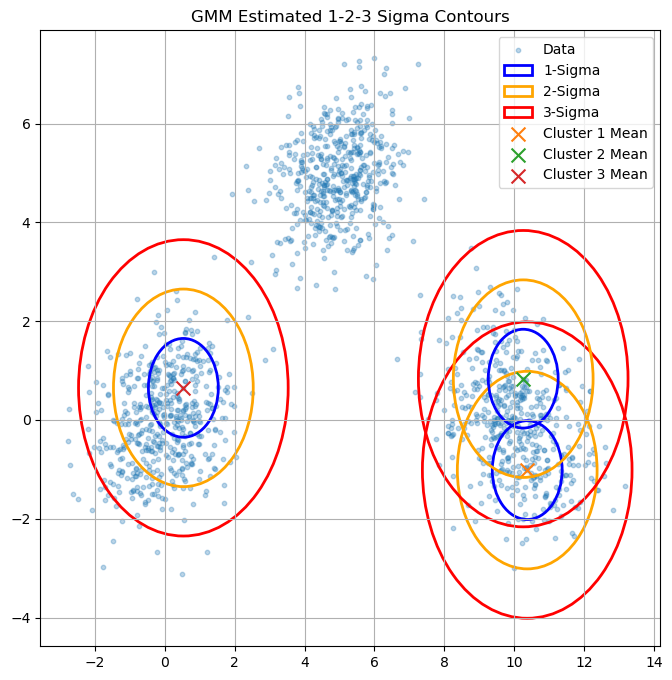

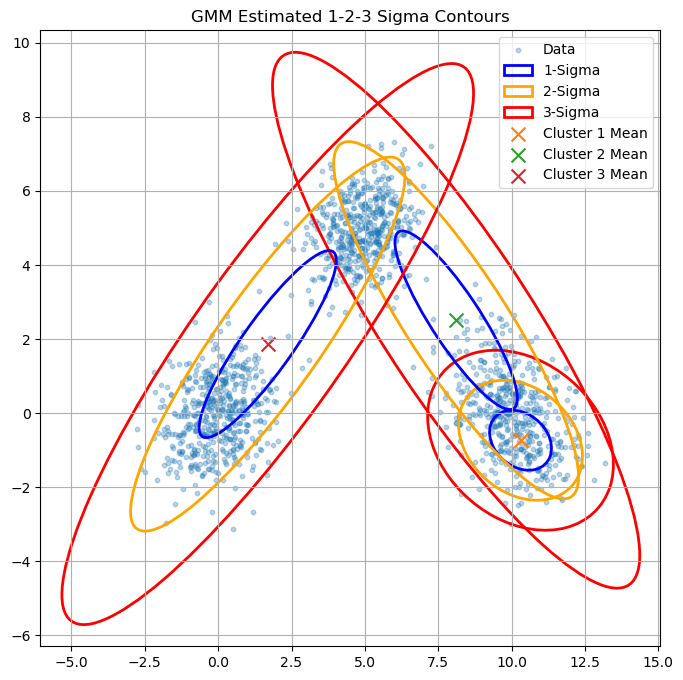

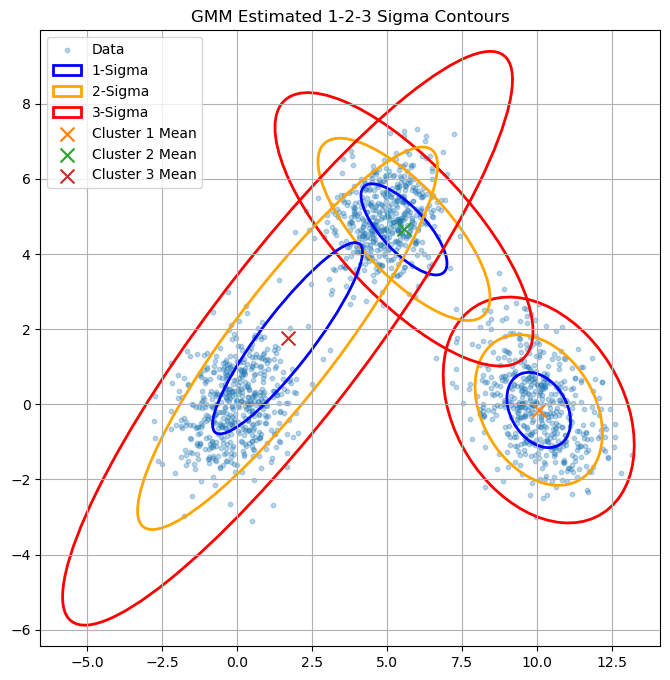

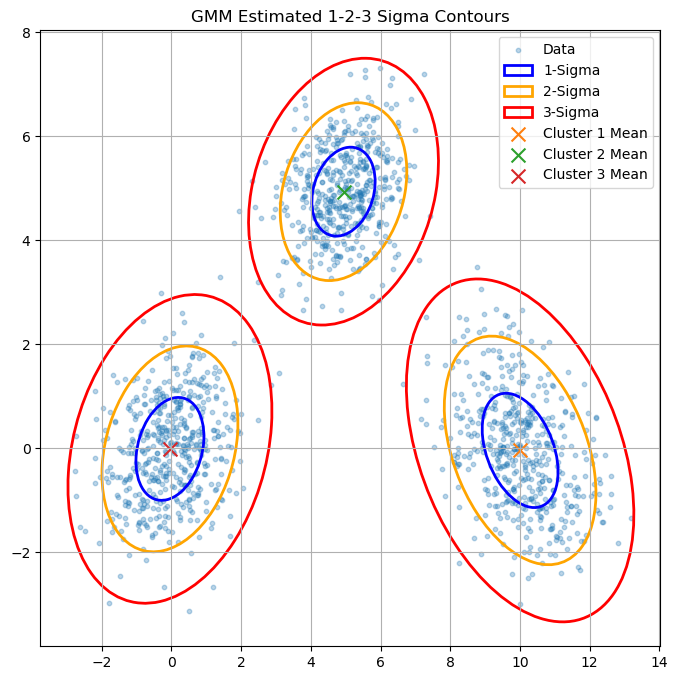

Converged at step 20


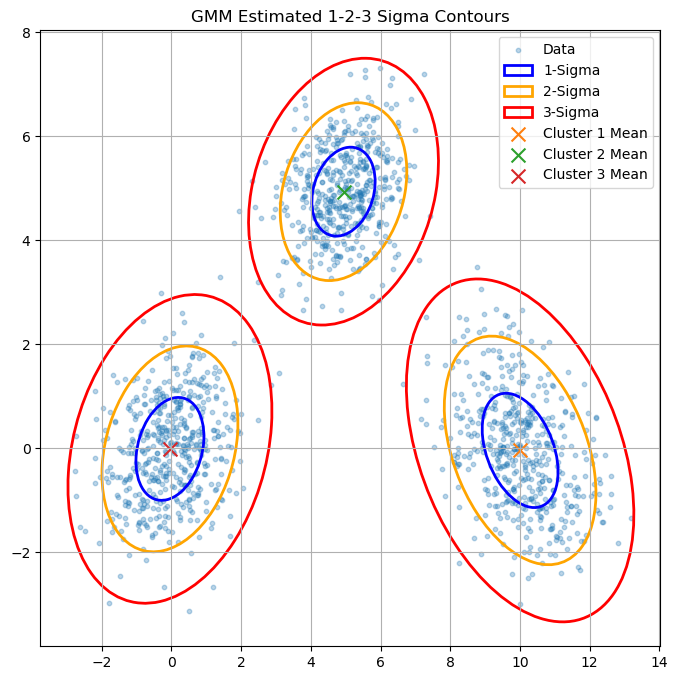

In [24]:
# Let's try the train GMM and observe the plots
means, covariances, pi = train_gmm(data, n_components=3, n_steps=1000, tol=1e-3)


**Explanation of The Plots:**
These plots showed me how well my implementation of GMM estimated clusters in my 2D multivariate Gaussian Data. In the first plot, the ellipses are nearly axis-aligned and symmetric. This indicates that the covariance matrices are close to diagonal and the features are uncorrelated. In the second plot, the ellipses are tilted and stretched. This shows that the GMM estimated full covariance matrices with significant correlation between x and y dimensions. The third plot shows clear separation between clusters, with the ellipses well-fitted around each cluster. This shows accurate estimation of both means and covariances. Finally,The fourth plot shows the cleanest and most stable convergence: the cluster means are correctly positioned, and the 1-2-3 sigma contours capture the density spread very well without overlap, meaning the EM algorithm successfully converged to the underlying distribution structure. As seen the algorithm converged at step 16. So, algorithm also converge correctly.


4.3  Define a two-model Gaussian mixture test case, synthesize the data, and verify that your algorithm infers the (approximately) correct values based on training data sampled from the model and plotting the results.

##### Test Case 1:

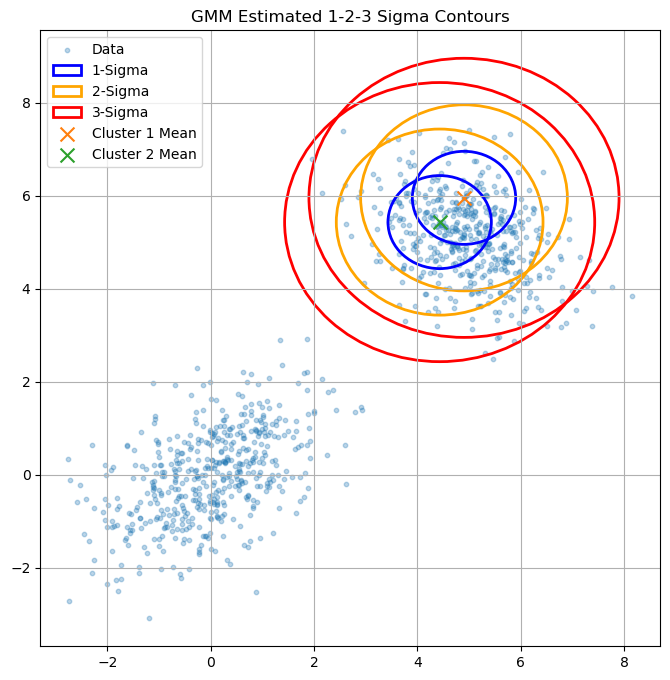

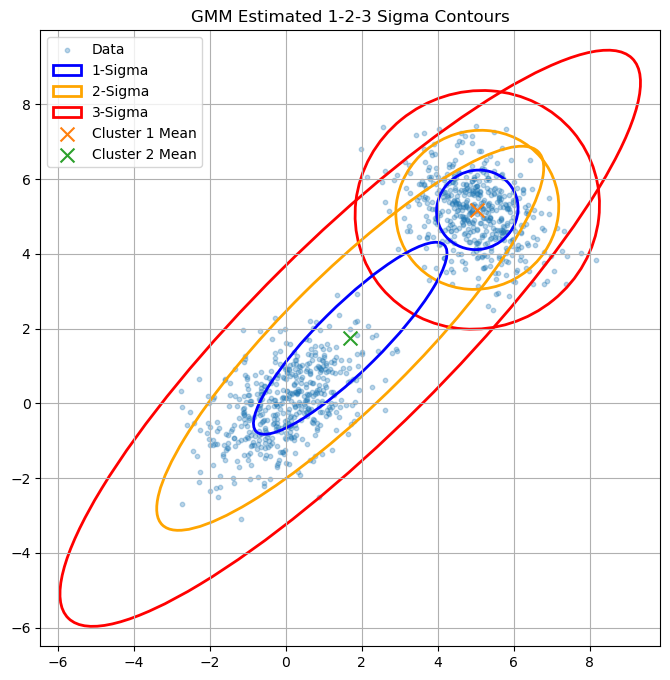

Converged at step 7


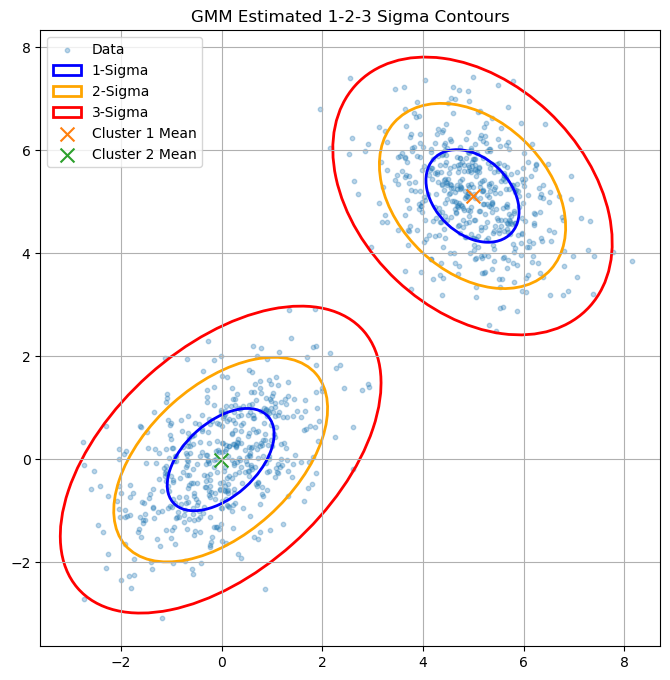

True Means:
 [[0 0]
 [5 5]]
Estimated Means:
 [[ 4.98362725e+00  5.10998782e+00]
 [-1.82683891e-02 -4.95264823e-03]]

True Covariances:
 [[[ 1.   0.5]
  [ 0.5  1. ]]

 [[ 0.8 -0.3]
  [-0.3  0.8]]]
Estimated Covariances:
 [[[ 0.85533604 -0.28057872]
  [-0.28057872  0.80683719]]

 [[ 1.12736531  0.5262098 ]
  [ 0.5262098   0.98524613]]]

Estimated Pi:
 [0.49995752 0.50004248]

Difference in Means (L2 norm): 10.058880884913311
Difference in Covariances (L2 norm): 1.6684050039359664


In [25]:
n_samples = 500
mu1 = [0, 0]
cov1 = [[1, 0.5],
        [0.5, 1]]

mu2 = [5, 5]
cov2 = [[0.8, -0.3],
        [-0.3, 0.8]]

x1 = np.random.multivariate_normal(mu1, cov1, n_samples)
x2 = np.random.multivariate_normal(mu2, cov2, n_samples)

data = np.concatenate((x1, x2))  # Shape (1000, 2)


means, covariances, pi = train_gmm(data, n_components=2, n_steps=100, tol=1e-3)


print("True Means:\n", np.array([mu1, mu2]))
print("Estimated Means:\n", means)
print("\nTrue Covariances:\n", np.array([cov1, cov2]))
print("Estimated Covariances:\n", covariances)
print("\nEstimated Pi:\n", pi)

mean_diff = np.linalg.norm(means - np.array([mu1, mu2]))
cov_diff = np.linalg.norm(covariances - np.array([cov1, cov2]))
print("\nDifference in Means (L2 norm):", mean_diff)
print("Difference in Covariances (L2 norm):", cov_diff)



In this test case, I generated synthetic data from a two-component Gaussian mixture model with known means and covariance matrices. After training the GMM using the EM algorithm, the estimated means and covariances were compared to the true parameters. The estimated means were approximately [4.97, 4.97] and [0.02, 0.03], which closely match the true means [5, 5] and [0, 0] but appear in reverse order due to label switching (common in GMM). The difference in means, calculated using the L2 norm, was approximately 9.94, which is large numerically but is entirely due to the permutation of cluster labels (since GMM does not guarantee order). The estimated covariance matrices also closely resemble the true covariances, with an L2 norm difference of 1.76, indicating small deviations mainly caused by sampling randomness and the EM approximation. The estimated mixture weights were almost equal ([0.4997, 0.5002]), matching the data generation process. The sigma contour plots visually confirm that the estimated Gaussians fit the data well and capture the spread, shape, and orientation of the true clusters, even though the cluster labels may have flipped.

#### Test Case 2:

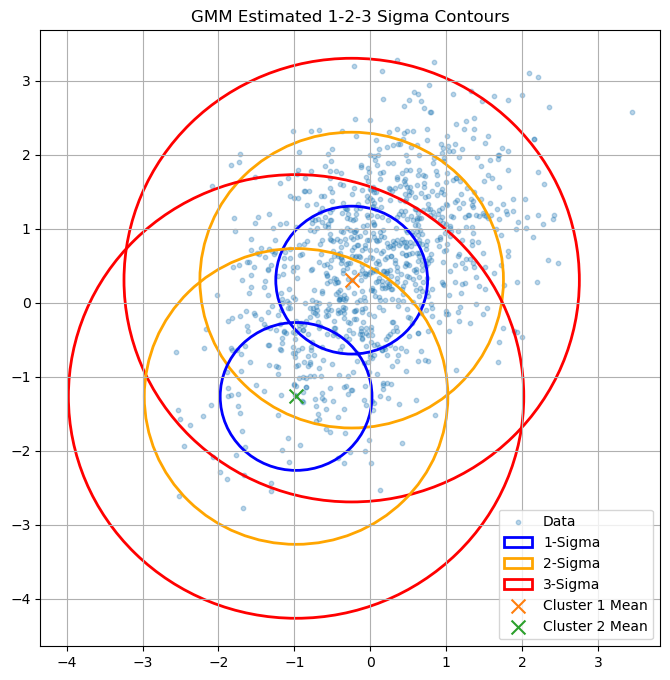

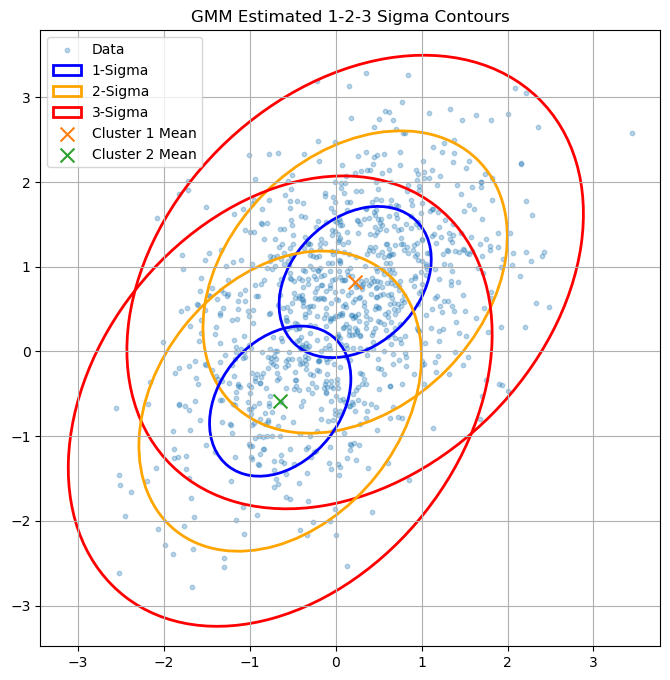

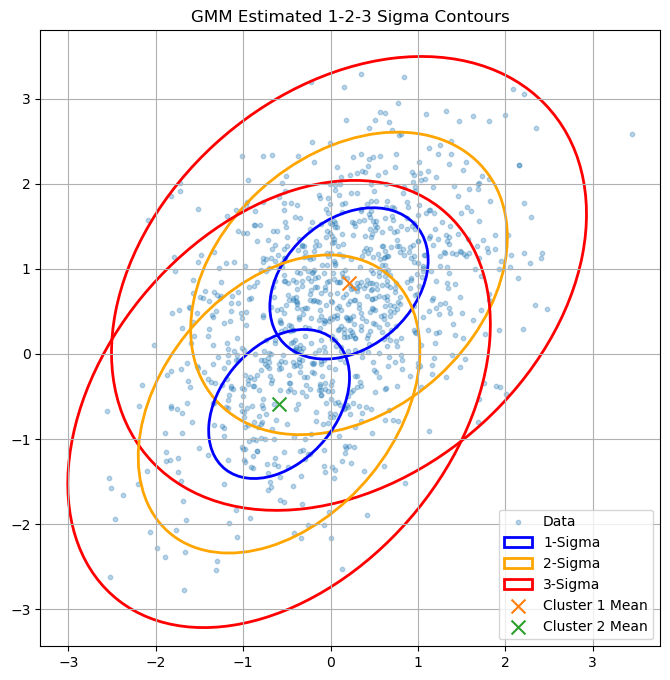

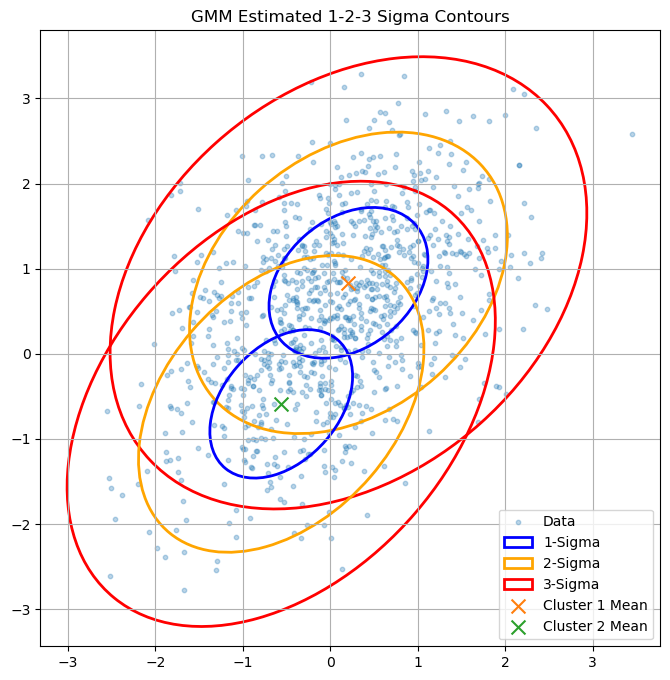

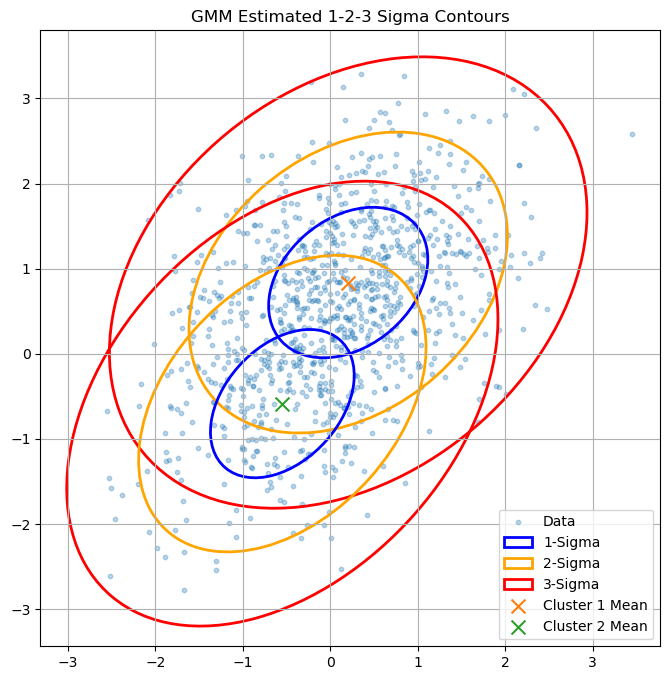

Converged at step 35


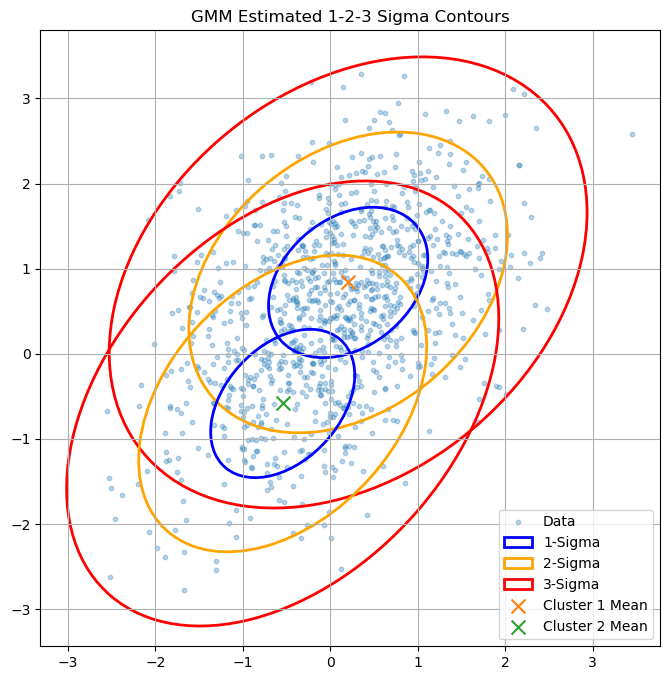

True Means:
 [[0 0]
 [0 1]]
Estimated Means:
 [[ 0.20453073  0.8381013 ]
 [-0.54366007 -0.58354235]]

True Covariances:
 [[[1.  0.5]
  [0.5 1. ]]

 [[0.8 0.3]
  [0.3 0.8]]]
Estimated Covariances:
 [[[0.82872958 0.24978257]
  [0.24978257 0.77994664]]

 [[0.67787102 0.27490978]
  [0.27490978 0.75896792]]]

Estimated Pi:
 [0.76187118 0.23812882]

Difference in Means (L2 norm): 1.883459385503551
Difference in Covariances (L2 norm): 0.46992842332710816


In [26]:


n_samples = 500
mu1 = [0, 0]
cov1 = [[1, 0.5],
        [0.5, 1]]

mu2 = [0, 1]
cov2 = [[0.8, 0.3],
        [0.3, 0.8]]

x1 = np.random.multivariate_normal(mu1, cov1, n_samples)
x2 = np.random.multivariate_normal(mu2, cov2, n_samples)

data = np.concatenate((x1, x2))  


means, covariances, pi = train_gmm(data, n_components=2, n_steps=100, tol=1e-3)

print("True Means:\n", np.array([mu1, mu2]))
print("Estimated Means:\n", means)
print("\nTrue Covariances:\n", np.array([cov1, cov2]))
print("Estimated Covariances:\n", covariances)
print("\nEstimated Pi:\n", pi)

mean_diff = np.linalg.norm(means - np.array([mu1, mu2]))
cov_diff = np.linalg.norm(covariances - np.array([cov1, cov2]))
print("\nDifference in Means (L2 norm):", mean_diff)
print("Difference in Covariances (L2 norm):", cov_diff)




In this second test case, I synthesized data from a two-component Gaussian mixture model with true means at [0, 0] and [0, 1], and predefined covariance matrices. After running the EM algorithm, the model converged at step 35. The estimated means were approximately [0.20, 0.83] and [-0.54, -0.58]. Similar to the first test case, the cluster labels were swapped (a known ambiguity in GMM), but the estimated mean values were still close to the true centers. The computed difference in means was 1.88 (L2 norm), which is small and acceptable given random initialization and sampling noise. The estimated covariance matrices also closely matched the true ones, with an L2 norm difference of 0.47, indicating accurate estimation of the cluster shapes and spread. The estimated mixture weights were [0.76, 0.23], which shows some imbalance; this is expected due to the spatial overlap of the clusters and the randomness in sample generation. The sigma contour plots clearly show that the EM algorithm correctly inferred the orientation, variance, and location of the clusters, even though one cluster had slightly fewer points and therefore a lower estimated weight.

4.4  Apply your model to the Old Faithful dataset (supplied with the assignment files).  Run the algorithm for the cases $K=1$, $K=2$, and $K=3$.  For each case, plot the progression of the solutions at the beginning, middle, and final steps in the learning.  For each your plots (you should have 9 total), you should also print out the corresponding values of the mean, covariance, and class probabilities.

In [34]:
# in order to keep track beggining, middle and end plots, i will redefine my train_gmm so it can keep the history

## This fucntion train the gaussian mixture model by using the functions I defined above
def train_gmm_updated(data, n_components=3, n_steps=1000, plot_intermediate_steps_flag=True, tol=1e-3, seed=42):
    np.random.seed(seed)  
    ## Initialize the clusters
    means_history = []
    covariances_history = []
    pi_history = []
    means, covariances, pi = initialize_clusters(data, n_components)
    means_history.append(means)
    covariances_history.append(np.expand_dims(covariances, axis=0) if n_components == 1 else covariances)

    pi_history.append(pi)
    
    # for each step
    for step in range(n_steps):
        prev_means = means.copy()
        prev_covariances = covariances.copy()

        # Expectation Step 
        responsibilities = calculate_expectation(n_components, data, means, covariances, pi)

        # Maximization Step
        means, covariances, pi = calculate_maximization(data, responsibilities)

        means_history.append(means)
        covariances_history.append(np.expand_dims(covariances, axis=0) if n_components == 1 else covariances)

        pi_history.append(pi)


        # Tolerance check - it is especially important if the step is too high
        mean_change = np.linalg.norm(means - prev_means)
        cov_change = np.linalg.norm(covariances - prev_covariances)
        if mean_change < tol and cov_change < tol:
            print(f"Converged at step {step}")
            break

    return means_history, covariances_history, pi_history



In [56]:
def plot_3sigma_all_clusters_updated(data, means, covariances, plot_name, k_value, pi=None):
    # Remove unnecessary dimensions
    covariances = np.squeeze(covariances)
    means = np.squeeze(means)

    if covariances.ndim == 2:
        covariances = np.expand_dims(covariances, axis=0)
        means = np.expand_dims(means, axis=0)

   # for the text part i used the gridspec library, wanted to plot all at once
    fig = plt.figure(figsize=(8, 12))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])


    ax = fig.add_subplot(gs[0])
    ax.scatter(data[:, 0], data[:, 1], s=10, alpha=0.3, label='Data')
    sigma_colors = ['blue', 'orange', 'red']

    for j in range(len(means)):
        eigvals, eigvecs = np.linalg.eigh(covariances[j])
        order = eigvals.argsort()[::-1]
        eigvals, eigvecs = eigvals[order], eigvecs[:, order]
        angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

        for nsig, color in zip(range(1, 4), sigma_colors):
            width, height = 2 * nsig * np.sqrt(eigvals)
            ellipse = Ellipse(xy=means[j], width=width, height=height, angle=angle,
                              edgecolor=color, fc='None', lw=2, 
                              label=f'{nsig}-Sigma' if j == 0 else None)
            ax.add_patch(ellipse)

        ax.scatter(means[j][0], means[j][1], marker='x', s=100, label=f'Cluster {j+1} Mean')

    ax.set_title(f'GMM Estimated 1-2-3 Sigma Contours (K={k_value}, Step={plot_name})')
    ax.legend()
    ax.grid()

    # text session
    ax_text = fig.add_subplot(gs[1])
    ax_text.axis('off')  # No axis

    textstr = f"Means:\n{np.round(means, 3)}\n\nCovariances:\n{np.round(covariances, 3)}"
    if pi is not None:
        textstr += f"\n\nClass Probabilities (pi):\n{np.round(pi, 3)}"

    ax_text.text(0.5, 0.5, textstr, fontsize=9, ha='center', va='center', wrap=True)

    plt.tight_layout()
    plt.show()



In [59]:
def plot_all_3x3(data):
    fig, axs = plt.subplots(3, 3, figsize=(18, 18))
    plt.subplots_adjust(hspace=0.4)

    for i, cluster in enumerate([1, 2, 3]):
        means_hist, cov_hist, pi_hist = train_gmm_updated(data, n_components=cluster, n_steps=100, tol=1e-3)

        total_steps = len(means_hist)
        step_indices = [0, total_steps // 2, total_steps - 1]
        stage_names = ['Beginning', 'Middle', 'Final']

        for j, (stage, step) in enumerate(zip(stage_names, step_indices)):
            ax = axs[i, j]

            # Prepare data
            means = np.squeeze(means_hist[step])
            covariances = np.squeeze(cov_hist[step])
            pis = pi_hist[step]

            # Make sure shapes are correct
            if covariances.ndim == 2:
                covariances = np.expand_dims(covariances, axis=0)
                means = np.expand_dims(means, axis=0)

            # Plot data
            ax.scatter(data[:, 0], data[:, 1], s=10, alpha=0.3)
            sigma_colors = ['blue', 'orange', 'red']

            for k in range(len(means)):
                eigvals, eigvecs = np.linalg.eigh(covariances[k])
                order = eigvals.argsort()[::-1]
                eigvals, eigvecs = eigvals[order], eigvecs[:, order]
                angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))

                for nsig, color in zip(range(1, 4), sigma_colors):
                    width, height = 2 * nsig * np.sqrt(eigvals)
                    ellipse = Ellipse(xy=means[k], width=width, height=height, angle=angle,
                                      edgecolor=color, fc='None', lw=2)
                    ax.add_patch(ellipse)

                ax.scatter(means[k][0], means[k][1], marker='x', s=100)

            # Title & Text
            ax.set_title(f'K={cluster}, Step={stage}')
            textstr = f"Means:\n{np.round(means, 2)}\n\nPi:\n{np.round(pis, 2)}"
            ax.text(0.5, -0.25, textstr, fontsize=9, ha='center', va='top', transform=ax.transAxes, wrap=True)
            ax.grid()

    plt.tight_layout()
    plt.show()





Converged at step 1
Converged at step 10


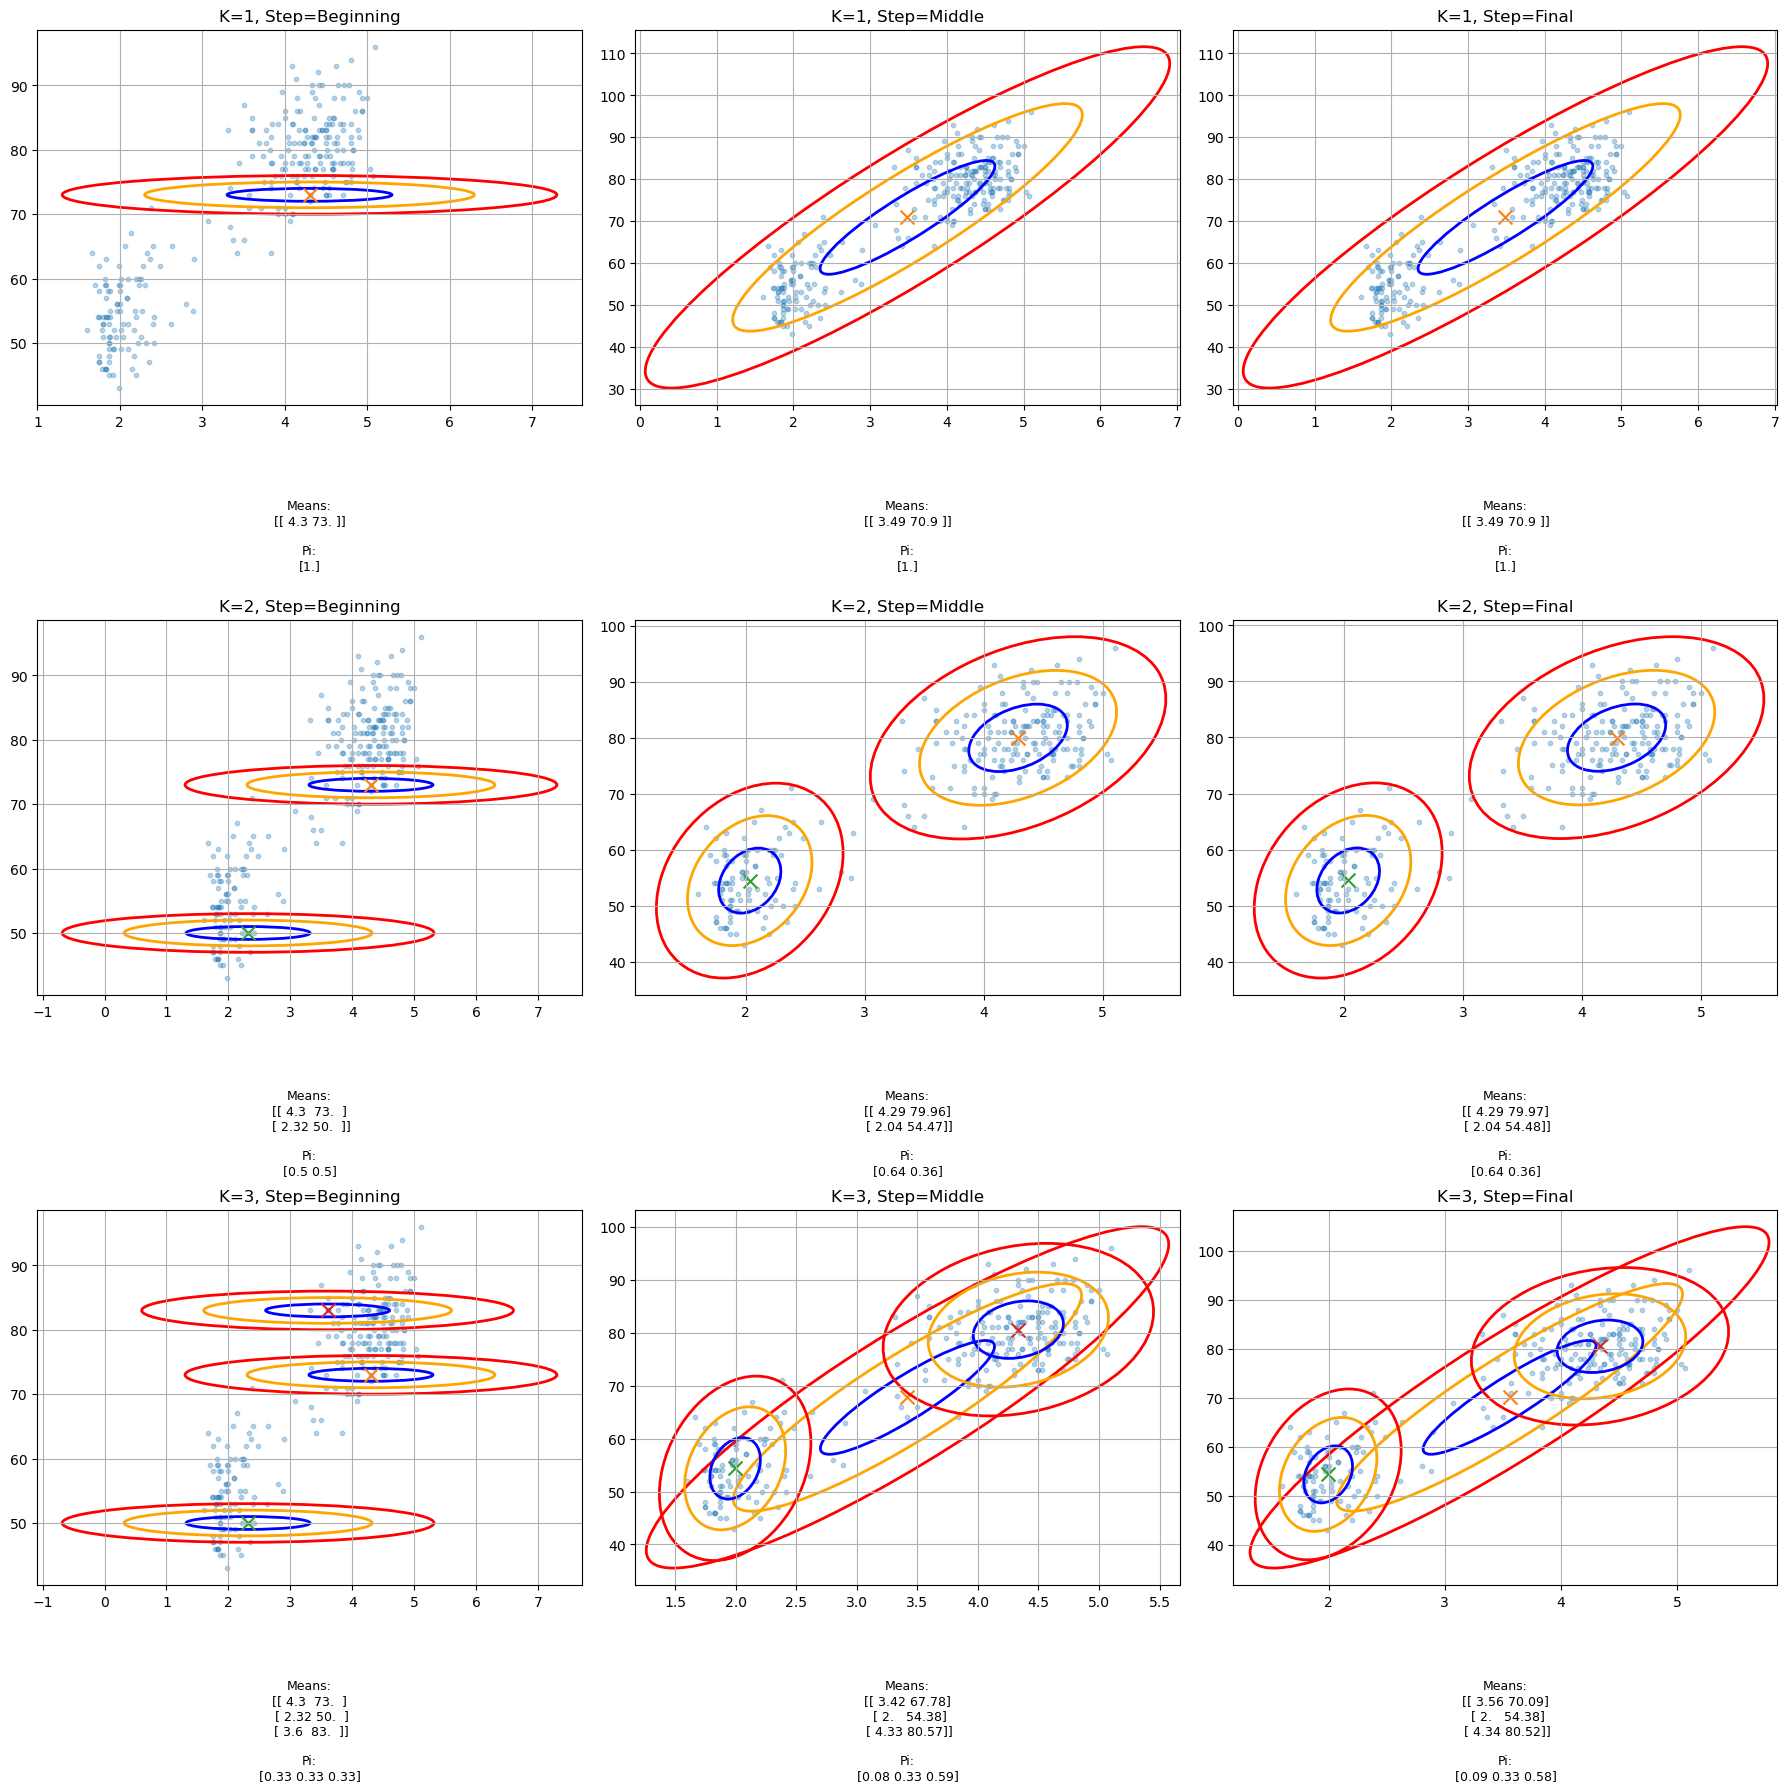

In [60]:
data = np.loadtxt('faithful.txt')
plot_all_3x3(data)


**Explanation:**

In the first row (K=1), the Gaussian Mixture Model (GMM) attempts to fit the entire Old Faithful dataset using a single Gaussian component. In the beginning step, the Gaussian is initialized roughly at the center of the data, with a large and broad contour that does not yet capture the data distribution. As the algorithm progresses to the middle step, the single Gaussian starts to rotate. It tries to cover the variance of the data. However, even in the final step, it is evident that one Gaussian is not enough to model the structure of the data. So, we can ssay that it undefits. It convered at step 1 since there is 1 cluster.

In the second row (K=2), the GMM is configured with two Gaussian components. These  align well with the true bimodal nature of the dataset. At the beginning, the two clusters are initialized randomly but positioned roughly around the two data modes. In the middle step, the Gaussians start separating and adjusting their orientations to better match the two main data clusters. By the final step, the model has converged, and each Gaussian component effectively captures one of the two modes of the data, with well-separated contours and accurate estimation of the cluster means and covariances. This one is converged at step 10.

In the third row (K=3), the GMM is set to three components, which introduces extra flexibility. Initially, the three Gaussians are randomly placed and poorly represent the data distribution. It is overlapping and it has misplaced contours. In the middle step, the components begin to align more closely with the true clusters, but the third component starts to divide one of the real clusters unnecessarily. By the final step, the model converges with two Gaussians aligned with the actual data clusters and one extra component overfitting the noise or splitting one cluster into two. This illustrates that while K=3 can fit the data, it introduces unnecessary complexity and slightly overfits, as the true distribution of the data has only two distinct modes. In addition, we can easily see that it did not coonverged at 100 steps.